In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotnine as p9

In [3]:
test_data_13f = pd.read_parquet('pulled/13f.parquet')

In [18]:
inst_df = test_data_13f.copy()
inst_df = inst_df.groupby('fdate', as_index=False).apply(lambda x: x.drop_duplicates(subset=['mgrno', 'mgrname'])).reset_index(drop=True)

In [ ]:
aum_df = test_data_13f.copy()

In [32]:
inst_df.typecode.fillna(6, inplace=True)

array([1., 5., 2., 4., 3., 6.])

In [69]:
type_counts = inst_df.groupby('fdate')['typecode'].value_counts().unstack()
type_counts.columns = ['Banks', 'Insurance companies', 'Investment advisors', 'Pension funds', 'Mututal funds', 'Other']
type_counts

,Banks,Insurance companies,Investment advisors,Pension funds,Mututal funds,Other
fdate,,,,,,
1980-03-31,223.0,64.0,51.0,122.0,73.0,NaN
1980-06-30,219.0,66.0,51.0,127.0,67.0,NaN
1980-09-30,220.0,69.0,50.0,129.0,68.0,NaN
1980-12-31,227.0,70.0,52.0,136.0,80.0,NaN
1981-03-31,228.0,67.0,50.0,137.0,89.0,NaN
...,...,...,...,...,...,...
2022-06-30,120.0,26.0,290.0,3507.0,2812.0,NaN
2022-09-30,117.0,25.0,285.0,3485.0,2796.0,77.0
2022-12-31,117.0,26.0,287.0,3435.0,2716.0,411.0


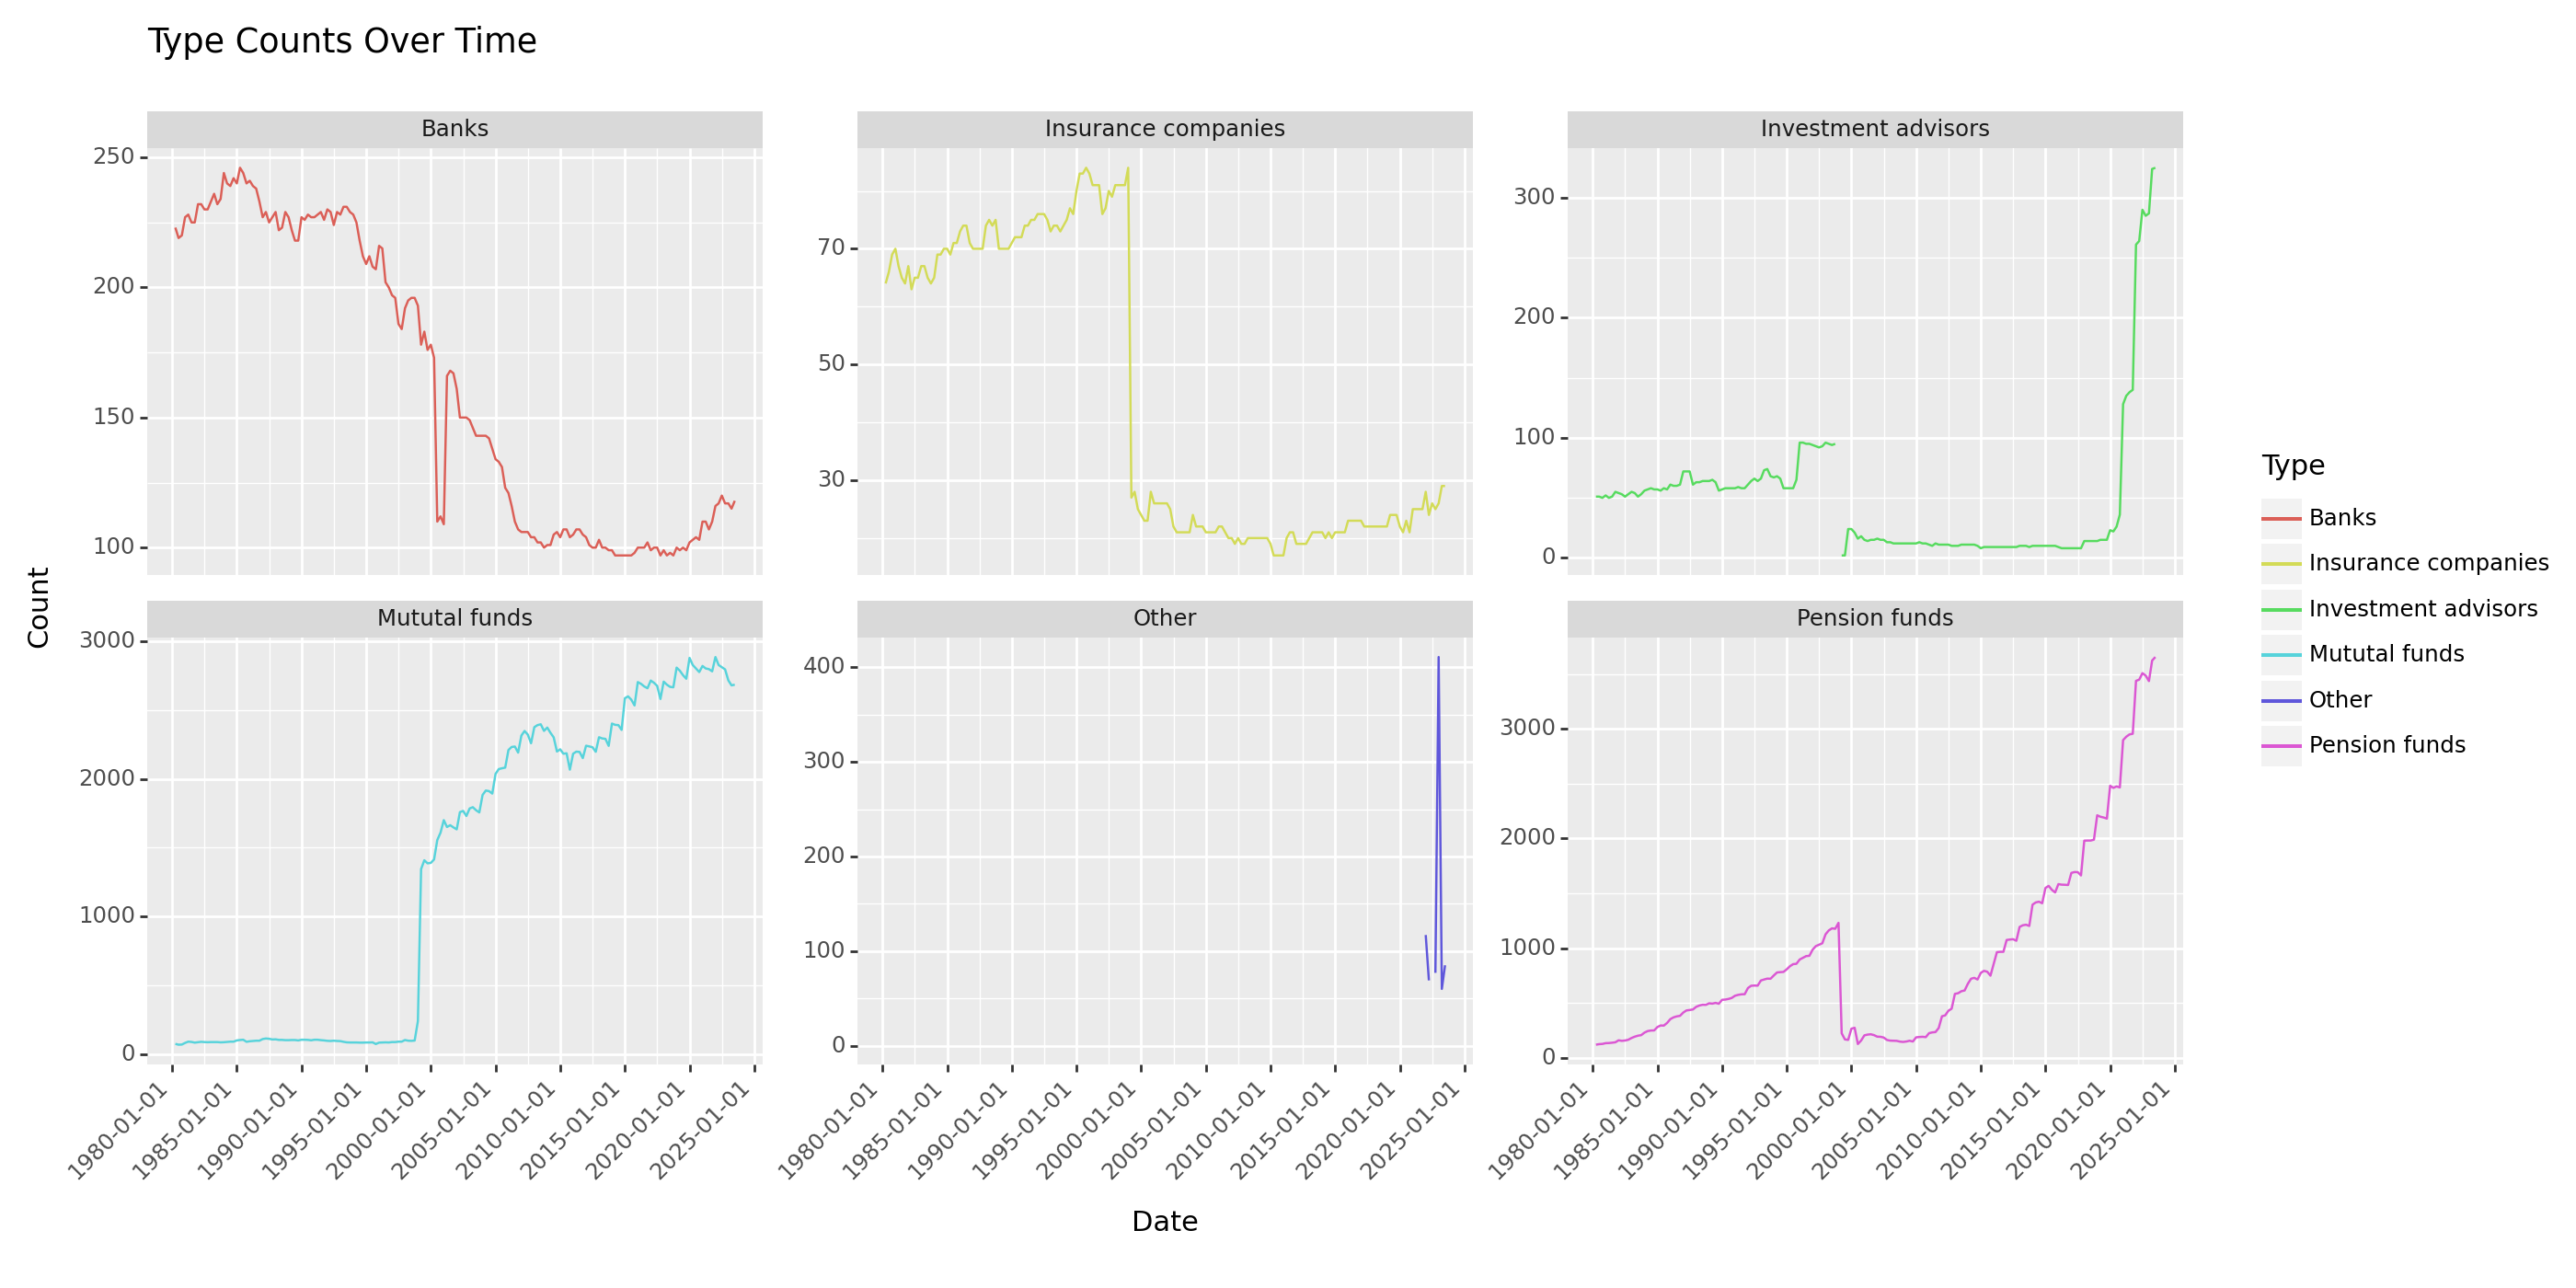

In [77]:
df = type_counts.copy()
df.reset_index(inplace=True)

long_df = df.melt(id_vars=['fdate'], var_name='Type', value_name='Count')

plot = (
    p9.ggplot(long_df, p9.aes(x='fdate', y='Count', color='Type')) +
    p9.geom_line() + 
    p9.labs(title='Type Counts Over Time', x='Date', y='Count') +  
    p9.facet_wrap('~ Type', ncol=3, scales='free_y') +
    p9.theme(
        figure_size=(14, 7),
        axis_text_x=p9.element_text(rotation=45, hjust=1),
        plot_title=p9.element_text(ha='center')
    )
)

plot.draw()